In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [12]:
#Load dataset
df = pd.read_csv(r"C:/Users/PRASHANT KUMAR YADAV/Documents/Pandas Aap/Unemployment India Dataset.csv")

Pre-Covid Rural Avg Unemployment Rate: 8.09
Covid Period Rural Avg Unemployment Rate: 16.12
Pre-Covid Urban Avg Unemployment Rate: 10.85
Covid Period Urban Avg Unemployment Rate: 19.35


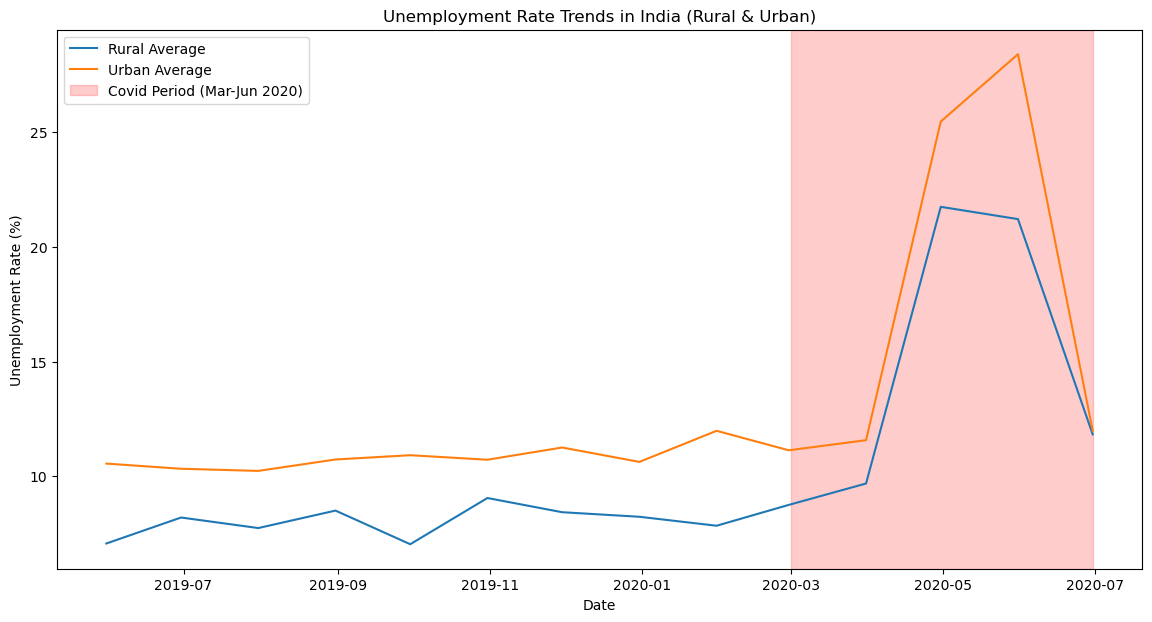

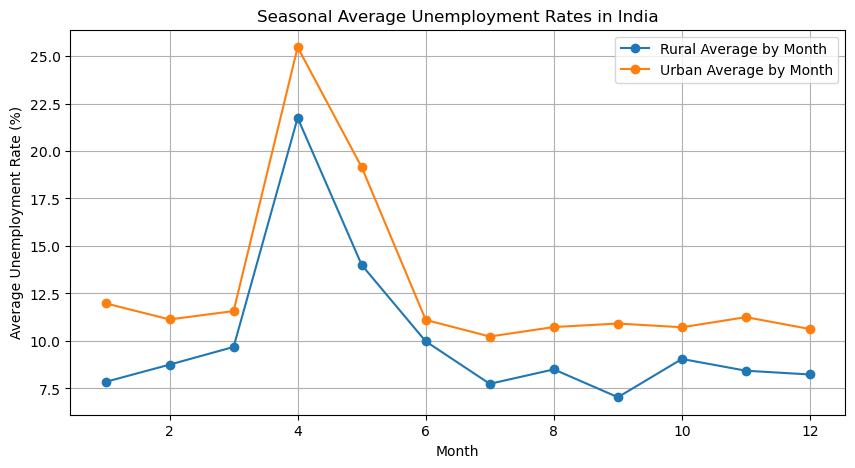


Insight: Covid-19 had a significant impact on unemployment in both rural and urban areas, suggesting a need for targeted economic relief and job creation measures.
Seasonal peaks identified suggest timing social assistance and employment programs around vulnerable months such as April and May.


In [13]:
# Data Cleaning
df.columns = [col.strip() for col in df.columns]
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
df = df[df['Frequency'].str.strip().str.lower() == 'monthly']
df = df.dropna(subset=['Estimated Unemployment Rate (%)', 'Date'])

# Separate Rural and Urban Data
df_rural = df[df['Area'].str.strip().str.lower() == 'rural'].copy()
df_urban = df[df['Area'].str.strip().str.lower() == 'urban'].copy()

# Add Month column for seasonal analysis
df_rural['Month'] = df_rural['Date'].dt.month
df_urban['Month'] = df_urban['Date'].dt.month

# Aggregate national average unemployment rate by date
rural_avg = df_rural.groupby('Date')['Estimated Unemployment Rate (%)'].mean()
urban_avg = df_urban.groupby('Date')['Estimated Unemployment Rate (%)'].mean()

# Define Covid period (March to June 2020)
covid_start = datetime(2020, 3, 1)
covid_end = datetime(2020, 6, 30)

# Calculate mean unemployment rates pre-Covid and during Covid
pre_covid_rural_mean = rural_avg[rural_avg.index < covid_start].mean()
covid_rural_mean = rural_avg[(rural_avg.index >= covid_start) & (rural_avg.index <= covid_end)].mean()
pre_covid_urban_mean = urban_avg[urban_avg.index < covid_start].mean()
covid_urban_mean = urban_avg[(urban_avg.index >= covid_start) & (urban_avg.index <= covid_end)].mean()

print("Pre-Covid Rural Avg Unemployment Rate:", round(pre_covid_rural_mean, 2))
print("Covid Period Rural Avg Unemployment Rate:", round(covid_rural_mean, 2))
print("Pre-Covid Urban Avg Unemployment Rate:", round(pre_covid_urban_mean, 2))
print("Covid Period Urban Avg Unemployment Rate:", round(covid_urban_mean, 2))

# Visualize unemployment trends with Covid period highlighted
plt.figure(figsize=(14,7))
sns.lineplot(x=rural_avg.index, y=rural_avg, label='Rural Average')
sns.lineplot(x=urban_avg.index, y=urban_avg, label='Urban Average')
plt.axvspan(covid_start, covid_end, color='red', alpha=0.2, label='Covid Period (Mar-Jun 2020)')
plt.title('Unemployment Rate Trends in India (Rural & Urban)')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.show()

# Seasonal trend analysis (average unemployment rate by month)
seasonal_rural = df_rural.groupby('Month')['Estimated Unemployment Rate (%)'].mean()
seasonal_urban = df_urban.groupby('Month')['Estimated Unemployment Rate (%)'].mean()

plt.figure(figsize=(10,5))
plt.plot(seasonal_rural.index, seasonal_rural.values, marker='o', label='Rural Average by Month')
plt.plot(seasonal_urban.index, seasonal_urban.values, marker='o', label='Urban Average by Month')
plt.title('Seasonal Average Unemployment Rates in India')
plt.xlabel('Month')
plt.ylabel('Average Unemployment Rate (%)')
plt.legend()
plt.grid(True)
plt.show()

# Policy Insights Based on Findings
if covid_rural_mean > pre_covid_rural_mean or covid_urban_mean > pre_covid_urban_mean:
    print("\nInsight: Covid-19 had a significant impact on unemployment in both rural and urban areas, suggesting a need for targeted economic relief and job creation measures.")
print("Seasonal peaks identified suggest timing social assistance and employment programs around vulnerable months such as April and May.")